In [1]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sleep_df = pd.read_pickle("sleep_dataframe.pkl")
tread_df = pd.read_pickle("treadmill_ex_dataframe.pkl")
run_df   = pd.read_pickle("running_ex_dataframe.pkl")
walk_df  = pd.read_pickle("walking_ex_dataframe.pkl")

In [3]:
def check_df_concat_capa():
    tread_col = [x for x in tread_df.columns]
    run_col   = [x for x in run_df.columns]
    walk_col  = [x for x in walk_df.columns]

    print ("Cols in Tread not in Run --> ", set(tread_col) - set(run_col))
    print ("Cols in Tread not in Walk --> ", set(tread_col) - set(walk_col))
    print ("Cols in Run not in Tread --> ", set(run_col) - set(tread_col))
    print ("Cols in Walk not in Tread --> ", set(walk_col) - set(tread_col))
    print ("Cols in Run not in Walk --> ", set(run_col) - set(walk_col))
    print ("Cols in Walk not in Run --> ", set(walk_col) - set(run_col))


In [4]:
check_df_concat_capa()
## Add milestone and time to run
run_df.insert(loc=len(run_df.columns), column="milestone", value=0)
run_df.insert(loc=len(run_df.columns), column="milestone_time", value=0)

## Walk and Run have the same atributes. So add milestone and time to walk as well.
walk_df.insert(loc=len(walk_df.columns), column="milestone", value=0)
walk_df.insert(loc=len(walk_df.columns), column="milestone_time", value=0)

## Add altitude related columns and remove comment
tread_df.insert(loc=len(tread_df.columns), column="altitude_gain", value = 0)
tread_df.insert(loc=len(tread_df.columns), column="altitude_loss", value = 0)
tread_df.insert(loc=len(tread_df.columns), column="max_altitude", value = 0)
tread_df.insert(loc=len(tread_df.columns), column="min_altitude", value = 0)
tread_df.drop(columns="comment", inplace=True)

Cols in Tread not in Run -->  {'milestone_time', 'milestone', 'comment'}
Cols in Tread not in Walk -->  {'milestone_time', 'milestone', 'comment'}
Cols in Run not in Tread -->  {'min_altitude', 'max_altitude', 'altitude_loss', 'altitude_gain'}
Cols in Walk not in Tread -->  {'min_altitude', 'max_altitude', 'altitude_loss', 'altitude_gain'}
Cols in Run not in Walk -->  set()
Cols in Walk not in Run -->  set()


In [5]:
check_df_concat_capa()

Cols in Tread not in Run -->  set()
Cols in Tread not in Walk -->  set()
Cols in Run not in Tread -->  set()
Cols in Walk not in Tread -->  set()
Cols in Run not in Walk -->  set()
Cols in Walk not in Run -->  set()


In [6]:
print ("Records in Treadmill  --> %d" %(len(tread_df)))
print ("Records in Walk       --> %d" %(len(walk_df)))
print ("Records in Run        --> %d" %(len(run_df)))

frames = [tread_df, walk_df, run_df]
atheletics_df = pd.concat(frames, sort=True)

print ("Records in Atheletics --> %d" %(len(atheletics_df)))


Records in Treadmill  --> 140
Records in Walk       --> 185
Records in Run        --> 86
Records in Atheletics --> 411


In [7]:
atheletics_df.head(10)

,altitude_gain,altitude_loss,calorie,decline_distance,distance,duration,exercise_type,incline_distance,live_data,location_data,max_altitude,max_heart_rate,max_speed,mean_heart_rate,mean_speed,milestone,milestone_time,min_altitude,min_heart_rate,start_time
8,0.0,0.0,514.800000,0.0,6400.0,2080619,15005,0.0,023d2fc0-d81c-a6ab-e5f8-d9cfb8d696f6.live_data...,023d2fc0-d81c-a6ab-e5f8-d9cfb8d696f6.location_...,0.0,208.000000,NA,179.000000,3.076008,0.0,0.0,0.0,131.000000,2017-10-17 13:43:35.503
15,0.0,0.0,312.000000,0.0,5400.0,2290000,15005,0.0,NA,NA,0.0,206.000000,NA,163.000000,2.358079,0.0,0.0,0.0,100.000000,2016-10-17 12:48:00.000
24,0.0,0.0,88.050000,0.0,1500.0,523495,15005,0.0,069ec983-8633-fb3d-e923-ad652c51e6e2.live_data...,069ec983-8633-fb3d-e923-ad652c51e6e2.location_...,0.0,197.000000,NA,149.000000,2.865357,0.0,0.0,0.0,109.000000,2018-06-21 14:12:17.159
29,0.0,0.0,202.080000,0.0,2850.0,1099166,15005,0.0,06c5c502-83b5-4d93-e96a-4074e896dfaa.live_data...,06c5c502-83b5-4d93-e96a-4074e896dfaa.location_...,0.0,187.000000,NA,160.000000,2.592875,0.0,0.0,0.0,116.000000,2018-06-18 13:45:13.729
39,0.0,0.0,829.880000,0.0,10900.0,4279794,15005,0.0,09d39140-9d75-92b2-1ffe-601d9dc3de74.live_data...,09d39140-9d75-92b2-1ffe-601d9dc3de74.location_...,0.0,181.500000,NA,153.500000,2.546852,10000.0,3601000.0,0.0,85.000000,2018-08-16 12:48:27.139
43,0.0,0.0,218.480000,0.0,3300.0,1205939,15005,0.0,0ac758a7-3d1d-cafb-c51e-d0126c5f0eaa.live_data...,0ac758a7-3d1d-cafb-c51e-d0126c5f0eaa.location_...,0.0,172.888889,NA,150.777778,2.736457,0.0,0.0,0.0,97.777778,2018-02-27 15:58:29.327
50,0.0,0.0,789.580000,0.0,12000.0,4223663,15005,0.0,0d37b20e-764d-fb8d-7451-51cfb53d364a.live_data...,0d37b20e-764d-fb8d-7451-51cfb53d364a.location_...,0.0,178.000000,NA,158.000000,2.841136,10000.0,3608000.0,0.0,99.000000,2018-08-30 13:24:51.848
54,0.0,0.0,95.340004,0.0,1500.0,471929,15005,0.0,0e628080-a19c-07f9-3736-5d8785b9000b.live_data...,0e628080-a19c-07f9-3736-5d8785b9000b.location_...,0.0,205.000000,NA,189.000000,3.178444,0.0,0.0,0.0,173.000000,2017-10-18 12:35:23.741
55,0.0,0.0,390.590000,0.0,5500.0,2145250,15005,0.0,0e63ce4b-c8ed-3a81-adb4-4d1b1b70f2d0.live_data...,0e63ce4b-c8ed-3a81-adb4-4d1b1b70f2d0.location_...,0.0,220.000000,NA,176.000000,2.563804,0.0,0.0,0.0,112.000000,2018-07-02 14:12:51.933
66,0.0,0.0,250.320000,0.0,3450.0,1311289,15005,0.0,10a5d012-6042-39eb-1df8-04ff22c10e51.live_data...,10a5d012-6042-39eb-1df8-04ff22c10e51.location_...,0.0,151.500000,NA,123.500000,2.630999,0.0,0.0,0.0,96.500000,2018-05-15 12:39:59.057


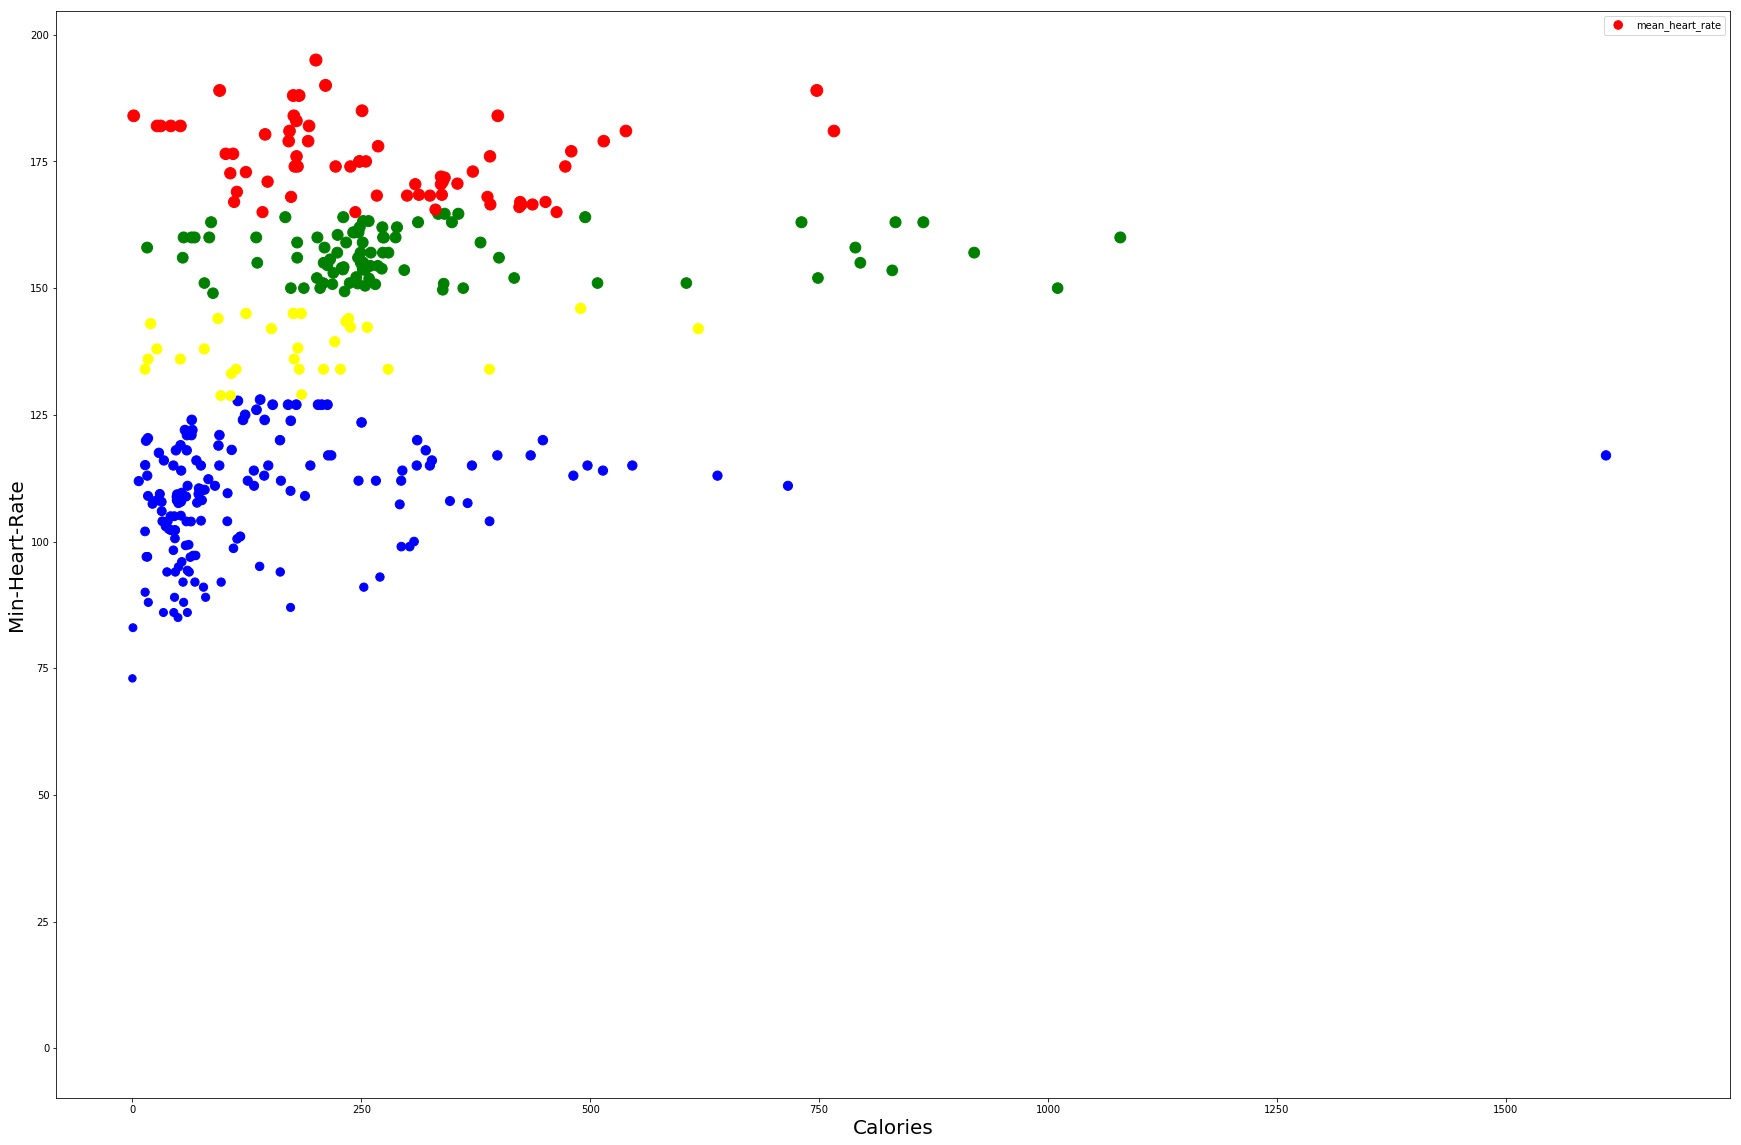

In [115]:
hr_cal = atheletics_df[["max_heart_rate", "mean_heart_rate", "calorie"]]

# Add heart zones
# Veyr Light -- Heart rate zone 1: 50–60% of HRmax
# Light -- Heart rate zone 2: 60–70% of HRmax
# Moderate -- Heart rate zone 3: 70–80% of HRmax
# Hard -- Heart rate zone 4: 80–90% of HRmax
# Maximum -- Heart rate zone 5: 90–100% of HRmax
# HRmax = 220-Age = 220-37 = 183

def heart_zone_calc (row_value):
    hrmax=220-37
    hr = row_value["mean_heart_rate"]
    if (hr < hrmax*0.7):
        return "Light"
    elif (hr < hrmax*0.8):
        return "Moderate"
    elif (hr < hrmax*0.9):
        return "Hard"
    else:
        return "Maximum"

hr_cal.insert(loc=len(hr_cal.columns), column="heart_zone", value=0.0)
hz_col = hr_cal.apply(lambda row_val: heart_zone_calc(row_val), axis=1)
hr_cal = hr_cal.assign(heart_zone=hz_col.values)

colour_chart = {"Light": "blue", "Moderate": "yellow", "Hard": "green", "Maximum": "red"}

fig, ax = plt.subplots(figsize=(30, 20))
ax.scatter(x=hr_cal["calorie"], 
           y=hr_cal["mean_heart_rate"], 
           s=hr_cal["mean_heart_rate"] * .75,
           marker="o", 
           c=hr_cal["heart_zone"].apply(lambda hz_val: colour_chart[hz_val])
           )

ax.set_xlabel("Calories", fontsize=20)
ax.set_ylabel("Min-Heart-Rate", fontsize=20)
#fig.suptitle("Calories Vs Min HR", fontsize=30)
zone   = [[x,colour_chart[x]] 
          for x in colour_chart]

plt.legend(zone[])
plt.show()
#for ind, row in hr_cal.iterrows():
#    ax.annotate("MxHR=" + str(row["max_heart_rate"]), xy=(row["calorie"], row["mean_heart_rate"]))